# **Social Network Ads data using Decision tree**

# **Importing needed packages**

In [ ]:

# Numpy library, wich is a popular Python library for numerical computing ,It provides a high-performance multidimensional array object and a wide range of functions to manipulate and perform operations on arrays.
import numpy as np

# Pandas library, which is a fast, flexible, and easy-to-use data analysis and data manipulation library for Python ,It provides data structures for efficiently storing large datasets and tools for working with them.
import pandas as pd

# Seaborn library, which is a Python data visualization library based on Matplotlib ,It provides a high-level interface for producing attractive and informative statistical graphics.
import seaborn as sns

# DecisionTreeClassifier class from the scikit-learn (sklearn) library ,This is a machine learning library for Python that provides a wide range of algorithms for classification, regression, clustering, and more. The DecisionTreeClassifier class is a decision tree classifier for supervised learning
from sklearn.tree import DecisionTreeClassifier


# imports several evaluation metrics from the scikit-learn metrics module.
# The classification_report function provides a report of the precision, recall, F1-score, and support for each class in a classification problem.
# The confusion_matrix function provides a matrix representation of the number of true positive, false positive, false negative, and true negative predictions made by a classifier.
# The accuracy_score function calculates the accuracy of a classification model, which is the ratio of correctly predicted instances to the total number of instances
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_recall_fscore_support

# train_test_split function from the scikit-learn model selection module. The train_test_split function is used to split a dataset into training and testing sets, which are used to train and evaluate a machine learning model.
from sklearn.model_selection import train_test_split

# Pyplot library from the Matplotlib library. Matplotlib is a plotting library for Python, and Pyplot provides a convenient interface for creating plots and figures. The plt namespace is used to simplify the process of creating plots and visualizations in the code.
import matplotlib.pyplot as plt


# **Load & read the dataset**

In [ ]:
# read_csv function from the Pandas library to load a comma-separated value (CSV) file into a Pandas DataFrame. The file name and its path is passed as an argument to the read_csv function. The DataFrame data will contain all the data from the CSV file.
data = pd.read_csv("/content/Socaila_Network_Ads_Dataset(1)(1).csv")

# head method of the Pandas DataFrame to display the first few records of the data , shows the first five records
data.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# **Dataset analysis**

In [ ]:
# Summarize the data
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
# info method of the Pandas DataFrame to display a summary of the data structure and information about each column in the DataFrame. This includes the data type of each column, the number of non-null values in each column, and the memory usage of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
# shape attribute of the Pandas DataFrame to display the dimensions of the DataFrame. The shape is represented as a tuple, with the first value representing the number of rows and the second value representing the number of columns in the DataFrame.
data.shape

(400, 3)

In [ ]:
# isnull method of the Pandas DataFrame to check for any missing values (null values) in the DataFrame.
# This line is used to check if there are any missing values in the data that need to be handled before building a machine learning model.
data.isnull().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

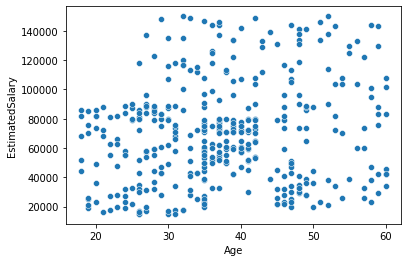

In [ ]:
# Plot a scatter plot to visualize the relationship between Age and EstimatedSalary
sns.scatterplot(x='Age', y='EstimatedSalary', data=data)
plt.show()

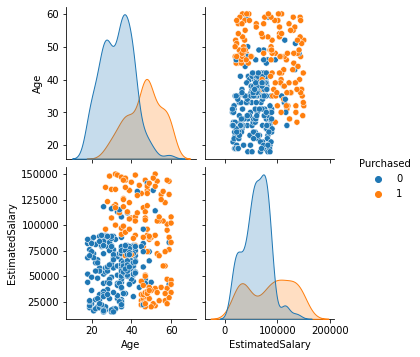

In [ ]:
# pairplot function from the Seaborn library to create a scatterplot matrix of all the variables in the DataFrame.
# 'data'  specifies the DataFrame to use (our dataset), and the hue  specifies the column to use for coloring the scatterplots. In this case, the Purchased column is used for coloring the scatterplots, so that the data points for each class of the target variable can be easily visualized and compared.
sns.pairplot(data=data ,hue ='Purchased')

# **Preprocessing Dataset**

In [ ]:
# extracts the Purchased column from the data and assigns it to the variable target. This column represents the target variable
target = data['Purchased']

# creates a copy of the data and assigns it to the variable df1 , to ensure that the original data is not altered during the preprocessing steps.
df1 = data.copy()

# drops the Purchased column from df1 , because we have already extracted this column and assigned it to the variable target
df1 = data.drop('Purchased',axis =1)

In [ ]:
# assigns the data stored in df1 to the variable X , X will be used as the feature set for the machine learning model.
X = df1

In [ ]:
#  displays the contents of the target variable.
target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
#  y will be used as the target variable in the machine learning model.
y = target

**splitting dataset into training and testing**

In [ ]:
# we use from sklearn.model_selection import train_test_split ,This function is used to split the data into training and testing sets, so that we can build the model on the training set and evaluate its performance on the test set.

# This line splits the data into training and testing sets using the train_test_split function.
# The data is split into 80% training data and 20% testing data, and the random_state parameter is set to 42 to ensure that the same splits are obtained every time the code is run.
# The independent variables (X) and the target variable (y) are passed as arguments to the train_test_split function.

X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

**Describe information about training and testing data**

In [ ]:
X_train.head()

,Age,EstimatedSalary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000


In [ ]:
X_test.head()

,Age,EstimatedSalary
209,46,22000
280,59,88000
33,28,44000
210,48,96000
93,29,28000


In [ ]:
X_train.shape

(320, 2)

In [ ]:
X_test.shape

(80, 2)

In [ ]:
y_train.head()

3      0
18     1
202    1
250    0
274    1
Name: Purchased, dtype: int64

In [ ]:
y_test.head()

209    0
280    1
33     0
210    1
93     0
Name: Purchased, dtype: int64

In [ ]:
y_train.shape

(320,)

In [ ]:
y_test.shape

(80,)

In [ ]:
# creates an instance of the DecisionTreeClassifier class and assigns it to the variable dtree
dtree = DecisionTreeClassifier(criterion = "entropy")

# trains the decision tree classifier on the training data using the fit method.
# The training data, including the independent variables (x_train) and the target variable (y_train), are passed as arguments to the fit method.
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

# **Evaluate the performance of DT**

In [ ]:
# "from sklearn.metrics import classification_report" imports the classification_report function from the scikit-learn library's metrics module
# The classification_report function is used to evaluate the performance of a classification model

# in this line we use the "predict" method of the "dtree" object to generate predictions for the test set represented by "X_test".
# The resulting predictions are stored in the "y_pred" variable.
y_pred = dtree.predict(X_test)


# generates a classification report and prints it to the console.
#  the function is passed two arguments: "y_test", which represents the true labels for the test set, and "y_pred", which represents the model's predictions for the test set
print('clssificaton report -\n',classification_report(y_test,y_pred))

clssificaton report -
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [ ]:
# Calculate the precision, recall, and F-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", fscore)

Precision: 0.8363731656184488
Recall: 0.8375
F-score: 0.8367965367965369


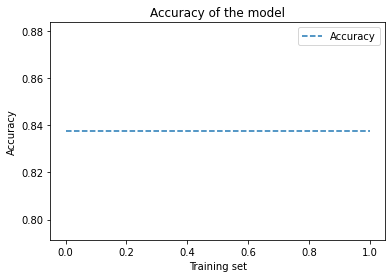

In [ ]:
# "from sklearn.metrics import accuracy_score" imports the accuracy_score function from the scikit-learn library's metrics module.
# The accuracy_score function is used to calculate the accuracy of a classification model, which is defined as the number of correct predictions divided by the total number of predictions


# calculates the accuracy of the model by passing "y_test" and "y_pred" as arguments to the accuracy_score function. The resulting accuracy is stored in the "accuracy" variable
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: ", accuracy)
plt.plot([0,1], [accuracy, accuracy], linestyle='--', label='Accuracy')
plt.legend()
plt.xlabel('Training set')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

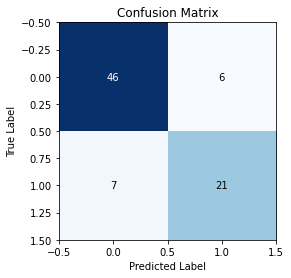

In [ ]:
# create a confusion matrix
#The goal of a confusion matrix is to determine the accuracy of a model's predictions by comparing its predictions with the actual results.
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# add labels to each cell
thresh = cm.max() / 2.


# The code loops through each cell in the matrix and adds the value of that cell to the plot using the text function.
# The color of the text is determined based on whether the value is greater than half of the maximum value in the matrix. If it is, the color is set to white, otherwise it is set to black

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")



In [ ]:
# installs the "graphviz" library, which is a graph visualization software used for rendering graphical representations of decision trees.
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


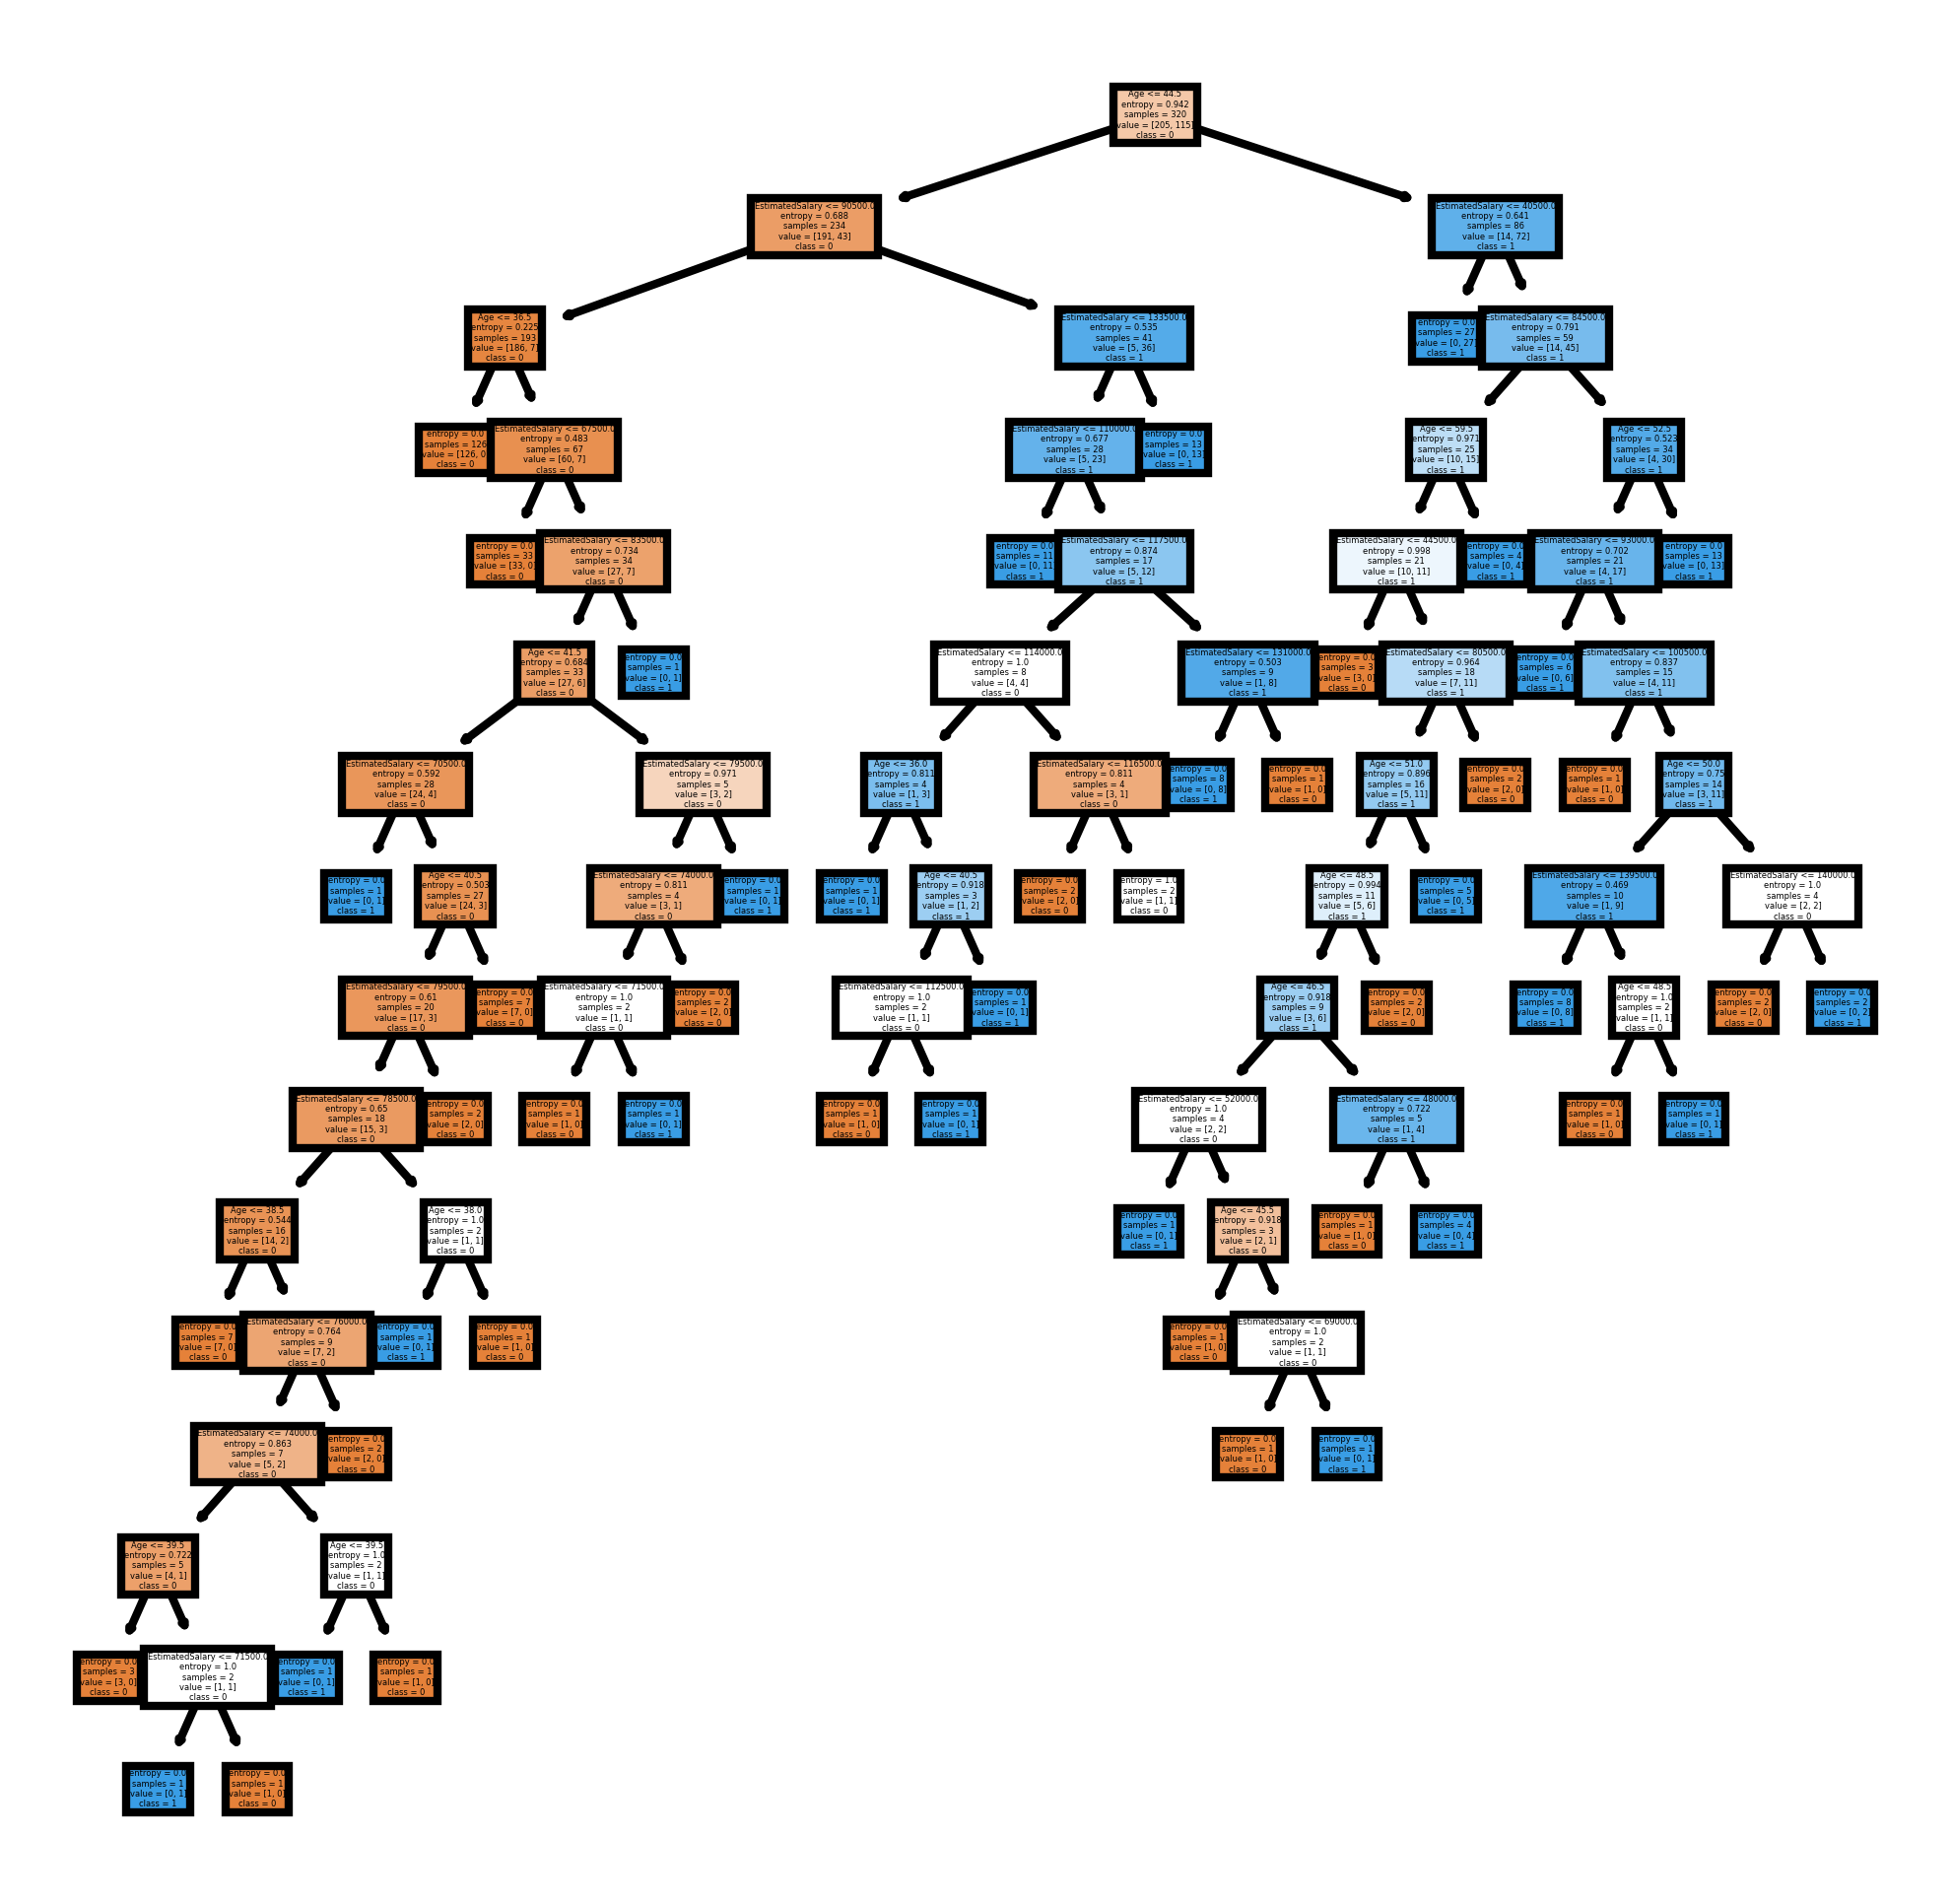

In [ ]:
import graphviz
# "fn" list stores the names of the features (i.e., "Age" and "EstimatedSalary") that the decision tree uses to make predictions.
#"cn" list stores the names of the target classes (i.e., "0" and "1").
fn = ['Age','EstimatedSalary']
cn = ['0','1']

#
from sklearn import tree
fn = ['Age','EstimatedSalary']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1 , ncols =1 , figsize =(4,4),dpi=600)
tree.plot_tree(dtree,feature_names =fn , class_names =cn , filled = True);
fig.savefig('imagename.png')

